In [305]:
import pandas as pd
import numpy as np

## Load Dataset

In [2]:
train = pd.read_csv("train.csv", parse_dates=["datetime"])

print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Explore

In [3]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

### Explore datetime

In [4]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

print(train.shape)
train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()

(10886, 18)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0


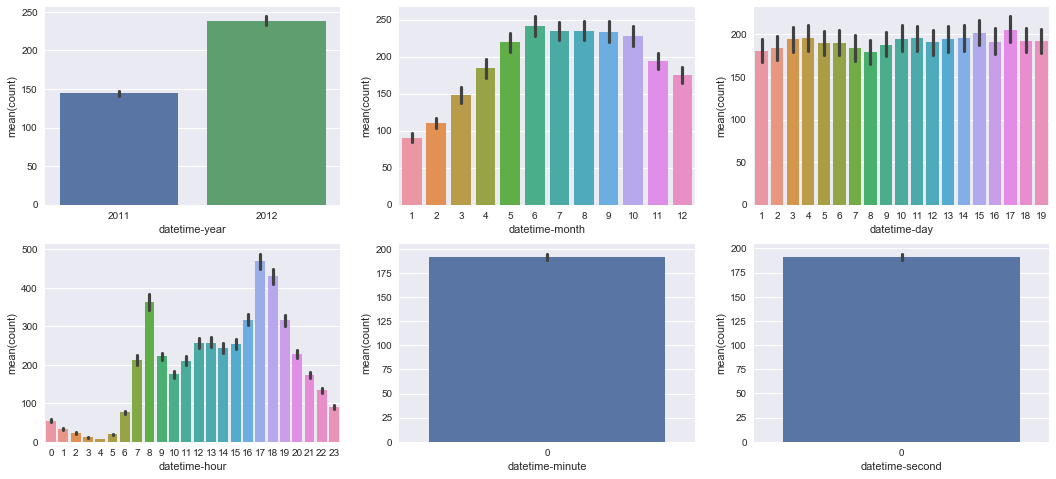

In [5]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)

** Lesson Learned **
  * **datetime-minute**와 **datetime-second**는 현재 기록되고 있지 않다. 그러므로 사용할 필요가 없다.
  * train.csv와 test.csv는 **datetime-day**를 기준으로 나뉘어져 있다. 그러므로 **datetime-day**를 feature로 사용해서는 안 된다.

### Explore hour - workingday

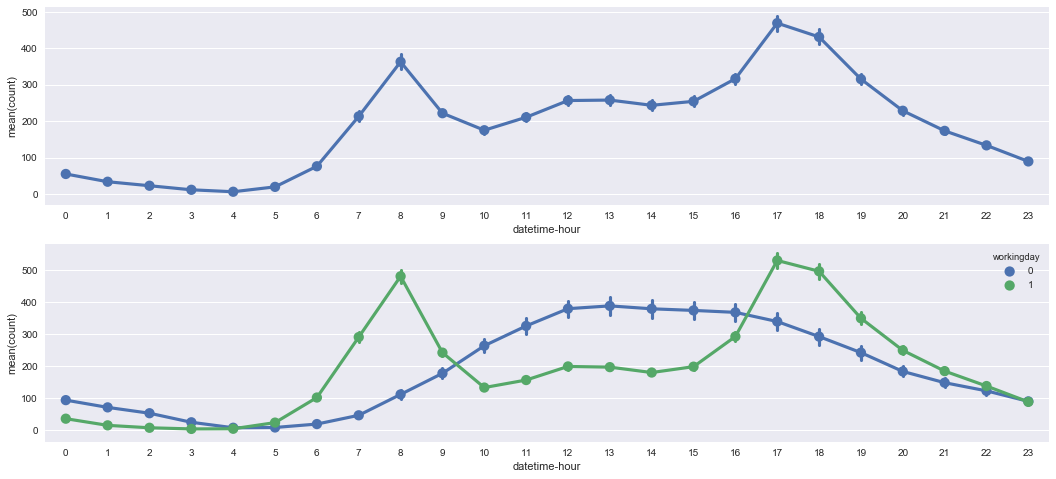

In [6]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 8)

sns.pointplot(data=train, x="datetime-hour", y="count", ax=ax1)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax2)

** Lesson Learned **
  * 주중(workingday==1)에는 출근 시간과 퇴근 시간에 자전거를 많이 대여한다.
  * 주말(workingday==0)에는 오후 시간에 자전거를 많이 대여한다.
  * 주중(월,화,수,목,금)이 주말(토,일)보다 많기 때문에, 두 개를 나눠서 보지 않으면 주말의 특성을 파악할 수 없다.

### Explore hour - dayofweek

In [7]:
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train[["datetime", "datetime-dayofweek"]].head()

(10886, 19)


,datetime,datetime-dayofweek
0,2011-01-01 00:00:00,5
1,2011-01-01 01:00:00,5
2,2011-01-01 02:00:00,5
3,2011-01-01 03:00:00,5
4,2011-01-01 04:00:00,5


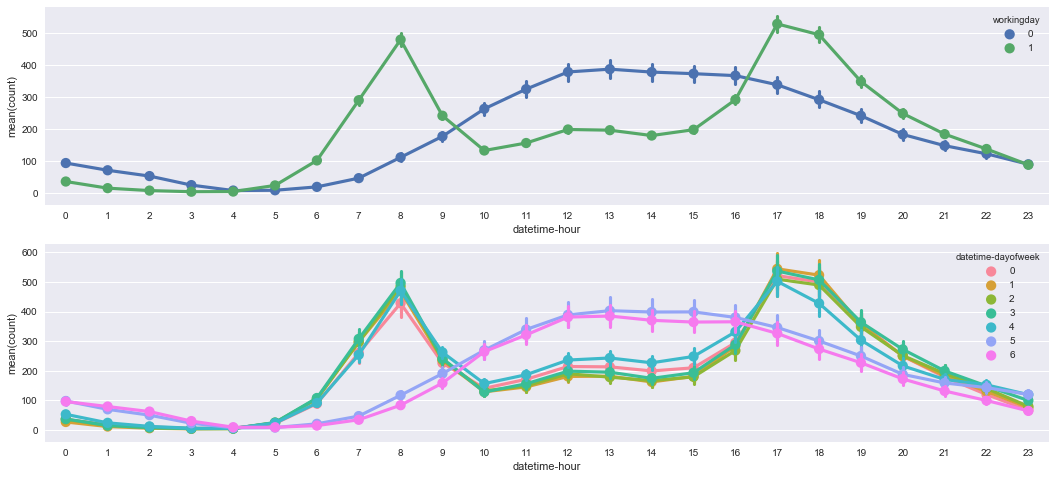

In [8]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 8)

sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax1)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek", ax=ax2)

** Lesson Learned **
  * 금요일(workingday==4)는 주중이지만, 아주 약간 주말의 특성을 반영하고 있다.
  * 비슷하게 월요일(workingday==0)도 아주 약간 주말의 특성을 반영하고 있다.
  * 사람들이 휴가를 월요일과 금요일에 사용하기 때문이라고 추측할 수 있다.

In [192]:
train_corr = train[['weather', 'temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

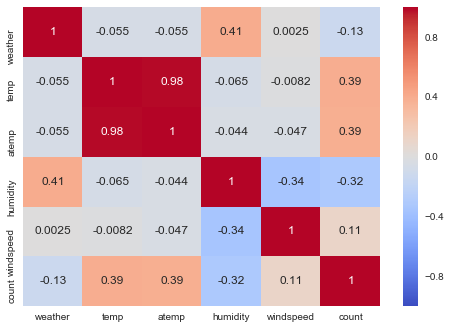

In [346]:
sns.heatmap(train_corr, annot=True, cmap='coolwarm')

/Users/Philip/.pyenv/versions/3.5.2/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


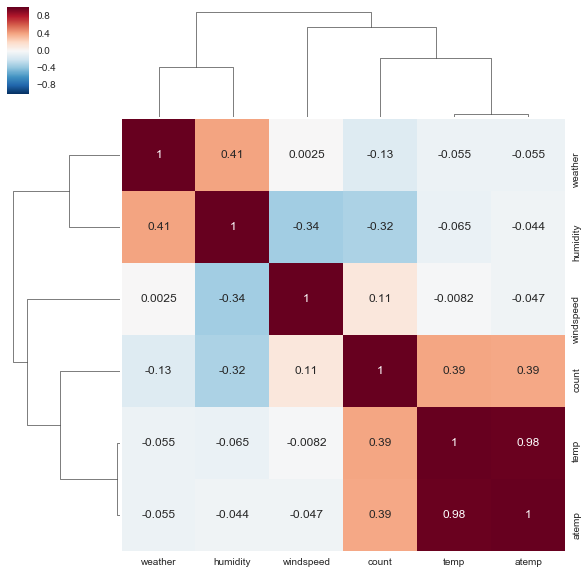

In [215]:
sns.clustermap(train_corr, annot=True)

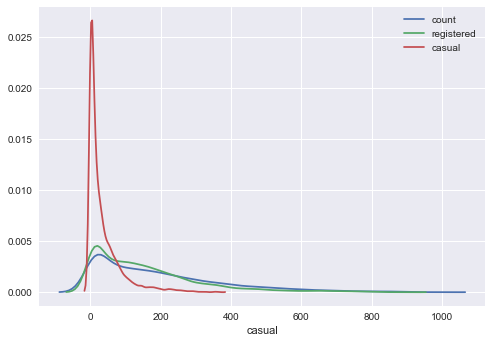

In [254]:
# figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
# fig = plt.figure(figsize=(12, 4))
sns.distplot(train['count'], hist=False, bins=40, label='count')
sns.distplot(train['registered'], hist=False, bins=40, label='registered')
sns.distplot(train['casual'], hist=False, bins=40, label='casual')
plt.legend()

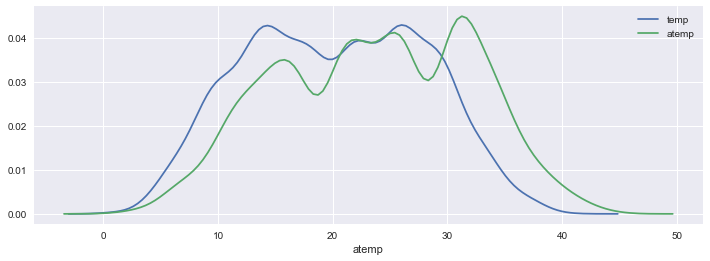

In [220]:
fig = plt.figure(figsize=(12, 4))
sns.distplot(train['temp'], hist=False, bins=40, label='temp')
sns.distplot(train['atemp'], hist=False, bins=40, label='atemp')
# sns.distplot(train['count'], hist=False, bins=40, label='count')

### Concatenate year and month

In [9]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train["datetime-year_month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime", "datetime-year_month"]].head()

(10886, 20)


,datetime,datetime-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


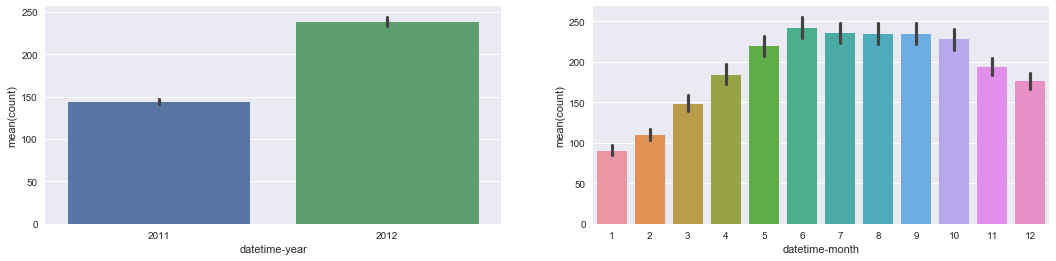

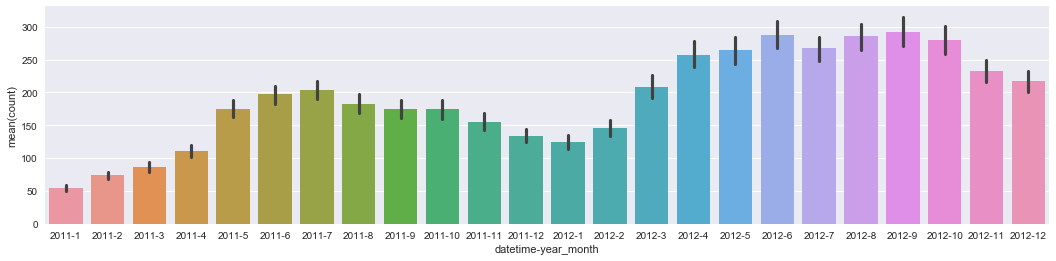

In [10]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)


figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year_month", y="count", ax=ax3)

** Lesson Learned **
  * 2011년 12월과 2012년 1월의 자전거 대여량을 비슷하지만, 두 개를 따로 놓고 보면 이를 알 수 없다.
  * 2011년에는 8월부터 대여량이 감소하고, 2012년에는 7월부터 대여량이 감소한다. 마찬가지로 따로 놓고 보면 이를 알 수 없다.

## Reload Dataset

In [11]:
train = pd.read_csv("train.csv", parse_dates=["datetime"])

print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [12]:
test = pd.read_csv("test.csv", parse_dates=["datetime"])

print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## Preprocessing

### Parse datetime

In [13]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

print(train.shape)
train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()

(10886, 18)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0


In [14]:
test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second

print(test.shape)
test[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()

(6493, 15)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-20 00:00:00,2011,1,20,0,0,0
1,2011-01-20 01:00:00,2011,1,20,1,0,0
2,2011-01-20 02:00:00,2011,1,20,2,0,0
3,2011-01-20 03:00:00,2011,1,20,3,0,0
4,2011-01-20 04:00:00,2011,1,20,4,0,0


## concatenate year and month

In [15]:
train["datetime-year_month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime", "datetime-year_month"]].head()

(10886, 19)


,datetime,datetime-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


In [16]:
train_year_month = pd.get_dummies(train["datetime-year_month"], prefix="datetime")

print(train_year_month.shape)
train_year_month.head()

(10886, 24)


,datetime_2011-1,datetime_2011-10,datetime_2011-11,datetime_2011-12,datetime_2011-2,datetime_2011-3,datetime_2011-4,datetime_2011-5,datetime_2011-6,datetime_2011-7,...,datetime_2012-11,datetime_2012-12,datetime_2012-2,datetime_2012-3,datetime_2012-4,datetime_2012-5,datetime_2012-6,datetime_2012-7,datetime_2012-8,datetime_2012-9
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
train = pd.concat([train, train_year_month], axis=1)

print(train.shape)
train.head()

(10886, 43)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,datetime_2012-11,datetime_2012-12,datetime_2012-2,datetime_2012-3,datetime_2012-4,datetime_2012-5,datetime_2012-6,datetime_2012-7,datetime_2012-8,datetime_2012-9
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,0,0,0,0,0,0,0,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,0,0,0,0,0,0,0,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,0,0,0,0,0,0,0,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,0,0,0,0,0,0,0,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
test["datetime-year_month"] = test["datetime"].apply(concatenate_year_month)

print(test.shape)
test[["datetime", "datetime-year_month"]].head()

(6493, 16)


,datetime,datetime-year_month
0,2011-01-20 00:00:00,2011-1
1,2011-01-20 01:00:00,2011-1
2,2011-01-20 02:00:00,2011-1
3,2011-01-20 03:00:00,2011-1
4,2011-01-20 04:00:00,2011-1


In [19]:
test_year_month = pd.get_dummies(test["datetime-year_month"], prefix="datetime")

print(test_year_month.shape)
test_year_month.head()

(6493, 24)


,datetime_2011-1,datetime_2011-10,datetime_2011-11,datetime_2011-12,datetime_2011-2,datetime_2011-3,datetime_2011-4,datetime_2011-5,datetime_2011-6,datetime_2011-7,...,datetime_2012-11,datetime_2012-12,datetime_2012-2,datetime_2012-3,datetime_2012-4,datetime_2012-5,datetime_2012-6,datetime_2012-7,datetime_2012-8,datetime_2012-9
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
test = pd.concat([test, test_year_month], axis=1)

print(test.shape)
test.head()

(6493, 40)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,...,datetime_2012-11,datetime_2012-12,datetime_2012-2,datetime_2012-3,datetime_2012-4,datetime_2012-5,datetime_2012-6,datetime_2012-7,datetime_2012-8,datetime_2012-9
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,...,0,0,0,0,0,0,0,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,0,0,0,0,0,0,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,0,0,0,0,0,0,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,0,0,0,0,0,0,0,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,0,0,0,0,0,0,0,0,0,0


### Parse dayofweek

In [21]:
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train[["datetime", "datetime-dayofweek"]].head()

(10886, 44)


,datetime,datetime-dayofweek
0,2011-01-01 00:00:00,5
1,2011-01-01 01:00:00,5
2,2011-01-01 02:00:00,5
3,2011-01-01 03:00:00,5
4,2011-01-01 04:00:00,5


In [22]:
train_dayofweek = pd.get_dummies(train["datetime-dayofweek"], prefix="datetime-dayofweek")

print(train_dayofweek.shape)
train_dayofweek.head()

(10886, 7)


,datetime-dayofweek_0,datetime-dayofweek_1,datetime-dayofweek_2,datetime-dayofweek_3,datetime-dayofweek_4,datetime-dayofweek_5,datetime-dayofweek_6
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0


In [23]:
train = pd.concat([train, train_dayofweek], axis=1)

print(train.shape)
train.head()

(10886, 51)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,datetime_2012-8,datetime_2012-9,datetime-dayofweek,datetime-dayofweek_0,datetime-dayofweek_1,datetime-dayofweek_2,datetime-dayofweek_3,datetime-dayofweek_4,datetime-dayofweek_5,datetime-dayofweek_6
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,0,0,5,0,0,0,0,0,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,0,0,5,0,0,0,0,0,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,0,0,5,0,0,0,0,0,1,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,0,0,5,0,0,0,0,0,1,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,0,0,5,0,0,0,0,0,1,0


In [24]:
test["datetime-dayofweek"] = test["datetime"].dt.dayofweek

print(test.shape)
test[["datetime", "datetime-dayofweek"]].head()

(6493, 41)


,datetime,datetime-dayofweek
0,2011-01-20 00:00:00,3
1,2011-01-20 01:00:00,3
2,2011-01-20 02:00:00,3
3,2011-01-20 03:00:00,3
4,2011-01-20 04:00:00,3


In [25]:
test_dayofweek = pd.get_dummies(test["datetime-dayofweek"], prefix="datetime-dayofweek")

print(test_dayofweek.shape)
test_dayofweek.head()

(6493, 7)


,datetime-dayofweek_0,datetime-dayofweek_1,datetime-dayofweek_2,datetime-dayofweek_3,datetime-dayofweek_4,datetime-dayofweek_5,datetime-dayofweek_6
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [26]:
test = pd.concat([test, test_dayofweek], axis=1)

print(test.shape)
test.head()

(6493, 48)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,...,datetime_2012-8,datetime_2012-9,datetime-dayofweek,datetime-dayofweek_0,datetime-dayofweek_1,datetime-dayofweek_2,datetime-dayofweek_3,datetime-dayofweek_4,datetime-dayofweek_5,datetime-dayofweek_6
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,...,0,0,3,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,0,3,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,0,3,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,0,0,3,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,0,0,3,0,0,0,1,0,0,0


## pd.get_dummies(Season)

In [27]:
train_season = pd.get_dummies(train['season'], prefix='season')

print(train_season.shape)
train_season.head()

(10886, 4)


,season_1,season_2,season_3,season_4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [28]:
train = pd.concat([train, train_season], axis=1)

In [29]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,datetime-dayofweek_1,datetime-dayofweek_2,datetime-dayofweek_3,datetime-dayofweek_4,datetime-dayofweek_5,datetime-dayofweek_6,season_1,season_2,season_3,season_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,0,0,0,0,1,0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,0,0,0,0,1,0,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,0,0,0,0,1,0,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,0,0,0,0,1,0,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,0,0,0,0,1,0,1,0,0,0


In [30]:
test_season = pd.get_dummies(test['season'], prefix='season')

print(test_season.shape)
test_season.head()

(6493, 4)


,season_1,season_2,season_3,season_4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [31]:
test = pd.concat([test, test_season], axis=1)
print(test.shape)
test.head()

(6493, 52)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,...,datetime-dayofweek_1,datetime-dayofweek_2,datetime-dayofweek_3,datetime-dayofweek_4,datetime-dayofweek_5,datetime-dayofweek_6,season_1,season_2,season_3,season_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,...,0,0,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,0,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,0,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,0,0,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,0,0,1,0,0,0,1,0,0,0


## windspeed의 빈값 채워주기

In [44]:
train['windspeed'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: windspeed, dtype: float64

In [59]:
train["prev-windspeed"] = train["windspeed"].shift(-1)
train["next-windspeed"] = train["windspeed"].shift(1)

train[["prev-windspeed", "windspeed", "next-windspeed"]].head(20)

,prev-windspeed,windspeed,next-windspeed
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,1.500800,NaN,NaN
3,3.001600,1.500800,NaN
4,6.003200,3.001600,1.500800
5,3.001600,6.003200,3.001600
6,1.500800,3.001600,6.003200
7,4.249475,1.500800,3.001600
8,8.498950,4.249475,1.500800
9,16.997900,8.498950,4.249475


In [60]:
train["windspeed-interpolate"] = (train["prev-windspeed"] + train["next-windspeed"] ) / 2

print(train.shape)
train[["prev-windspeed", "windspeed", "next-windspeed", "windspeed-interpolate"]].head(20)

(10886, 58)


,prev-windspeed,windspeed,next-windspeed,windspeed-interpolate
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,1.500800,NaN,NaN,NaN
3,3.001600,1.500800,NaN,NaN
4,6.003200,3.001600,1.500800,3.752000
5,3.001600,6.003200,3.001600,3.001600
6,1.500800,3.001600,6.003200,3.752000
7,4.249475,1.500800,3.001600,3.625538
8,8.498950,4.249475,1.500800,4.999875
9,16.997900,8.498950,4.249475,10.623688


In [64]:
# pd.isnull(train['windspeed'])
# train['windspeed'].fillna(value = train['windspeed-interpolate'])

train.loc[train["windspeed"] == 0, "windspeed"] = train.loc[train["windspeed"] == 0, "windspeed-interpolate"]

train['windspeed']
train['windspeed'] = train['windspeed'].fillna(value = train['windspeed'].mean())

In [66]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,datetime-dayofweek_4,datetime-dayofweek_5,datetime-dayofweek_6,season_1,season_2,season_3,season_4,prev-windspeed,next-windspeed,windspeed-interpolate
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,13.435592,3,...,0,1,0,1,0,0,0,NaN,NaN,NaN
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,13.435592,8,...,0,1,0,1,0,0,0,NaN,NaN,NaN
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,13.435592,5,...,0,1,0,1,0,0,0,1.5008,NaN,NaN
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,1.500800,3,...,0,1,0,1,0,0,0,3.0016,NaN,NaN
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,3.001600,0,...,0,1,0,1,0,0,0,6.0032,1.5008,3.752


## 테스트 테이터의 windspeed 빈값 채워주기

In [68]:
test['windspeed']


0       26.0027
1        0.0000
2        0.0000
3       11.0014
4       11.0014
5       15.0013
6       15.0013
7       15.0013
8       19.0012
9       15.0013
10      19.9995
11      11.0014
12       0.0000
13       7.0015
14       8.9981
15      12.9980
16       8.9981
17       7.0015
18      12.9980
19      22.0028
20      19.0012
21      16.9979
22      19.0012
23      22.0028
24      16.9979
25      16.9979
26      11.0014
27      19.9995
28       6.0032
29      27.9993
         ...   
6463    19.9995
6464     0.0000
6465    22.0028
6466    11.0014
6467    12.9980
6468    15.0013
6469    12.9980
6470    12.9980
6471    11.0014
6472     7.0015
6473     7.0015
6474    12.9980
6475    11.0014
6476     8.9981
6477     8.9981
6478     7.0015
6479     8.9981
6480    12.9980
6481    12.9980
6482    11.0014
6483    15.0013
6484     8.9981
6485    12.9980
6486     6.0032
6487     8.9981
6488    11.0014
6489    11.0014
6490    11.0014
6491     8.9981
6492     8.9981
Name: windspeed, Length:

In [77]:
test["prev-windspeed"] = test["windspeed"].shift(-1)
test["next-windspeed"] = test["windspeed"].shift(1)

test[["prev-windspeed", "windspeed", "next-windspeed"]].head(20)

,prev-windspeed,windspeed,next-windspeed
0,13.00135,26.00270,NaN
1,5.50070,13.00135,26.00270
2,11.00140,5.50070,13.00135
3,11.00140,11.00140,5.50070
4,15.00130,11.00140,11.00140
5,15.00130,15.00130,11.00140
6,15.00130,15.00130,15.00130
7,19.00120,15.00130,15.00130
8,15.00130,19.00120,15.00130
9,19.99950,15.00130,19.00120


In [71]:
test["windspeed-interpolate"] = (test["prev-windspeed"] + test["next-windspeed"] ) / 2

print(test.shape)
test[["prev-windspeed", "windspeed", "next-windspeed", "windspeed-interpolate"]].head(20)

(6493, 55)


,prev-windspeed,windspeed,next-windspeed,windspeed-interpolate
0,0.0000,26.0027,NaN,NaN
1,0.0000,0.0000,26.0027,13.00135
2,11.0014,0.0000,0.0000,5.50070
3,11.0014,11.0014,0.0000,5.50070
4,15.0013,11.0014,11.0014,13.00135
5,15.0013,15.0013,11.0014,13.00135
6,15.0013,15.0013,15.0013,15.00130
7,19.0012,15.0013,15.0013,17.00125
8,15.0013,19.0012,15.0013,15.00130
9,19.9995,15.0013,19.0012,19.50035


In [78]:
test.loc[test["windspeed"] == 0, "windspeed"] = test.loc[test["windspeed"] == 0, "windspeed-interpolate"]

# test['windspeed']
test['windspeed'] = test['windspeed'].fillna(value = test['windspeed'].mean())

In [84]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,...,datetime-dayofweek_4,datetime-dayofweek_5,datetime-dayofweek_6,season_1,season_2,season_3,season_4,prev-windspeed,next-windspeed,windspeed-interpolate
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.00270,2011,...,0,0,0,1,0,0,0,13.00135,NaN,NaN
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,13.00135,2011,...,0,0,0,1,0,0,0,5.50070,26.00270,13.00135
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,5.50070,2011,...,0,0,0,1,0,0,0,11.00140,13.00135,5.50070
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.00140,2011,...,0,0,0,1,0,0,0,11.00140,5.50070,5.50070
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.00140,2011,...,0,0,0,1,0,0,0,15.00130,11.00140,13.00135


In [255]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,datetime-dayofweek_4,datetime-dayofweek_5,datetime-dayofweek_6,season_1,season_2,season_3,season_4,prev-windspeed,next-windspeed,windspeed-interpolate
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,13.435592,3,...,0,1,0,1,0,0,0,NaN,NaN,NaN
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,13.435592,8,...,0,1,0,1,0,0,0,NaN,NaN,NaN
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,13.435592,5,...,0,1,0,1,0,0,0,1.5008,NaN,NaN
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,1.500800,3,...,0,1,0,1,0,0,0,3.0016,NaN,NaN
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,3.001600,0,...,0,1,0,1,0,0,0,6.0032,1.5008,3.752


In [285]:
# test['next-windspeed'] = test['next-windspeed'].fillna(value=0)

In [286]:
# pd.isnull(test['next-windspeed']).unique()

array([False], dtype=bool)

In [287]:
# wind_feature_names = ['prev-windspeed', 'next-windspeed']

In [288]:
# X_train = train[wind_feature_names]
# X_test = test[wind_feature_names]

# wind_label_name = "windspeed"

# y_train = train[wind_label_name]

In [289]:
# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor(random_state=33)
# model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=33,
           verbose=0, warm_start=False)

In [290]:
# model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=33,
           verbose=0, warm_start=False)

In [296]:
# predictions = model.predict(X_test)

# test['windspeed'] = predictions
# predictions

array([  5.47591   ,  11.0014    ,  12.20137   , ...,  10.49973834,
        10.49973834,   6.499     ])

In [294]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,...,datetime-dayofweek_4,datetime-dayofweek_5,datetime-dayofweek_6,season_1,season_2,season_3,season_4,prev-windspeed,next-windspeed,windspeed-interpolate
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,5.47591,2011,...,0,0,0,1,0,0,0,13.00135,0.00000,0.00000
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,11.00140,2011,...,0,0,0,1,0,0,0,5.50070,26.00270,13.00135
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,12.20137,2011,...,0,0,0,1,0,0,0,11.00140,13.00135,5.50070
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.00140,2011,...,0,0,0,1,0,0,0,11.00140,5.50070,5.50070
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,13.03354,2011,...,0,0,0,1,0,0,0,15.00130,11.00140,13.00135


In [327]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 58 columns):
datetime                 10886 non-null datetime64[ns]
season                   10886 non-null int64
holiday                  10886 non-null int64
workingday               10886 non-null int64
weather                  10886 non-null int64
temp                     10886 non-null float64
atemp                    10886 non-null float64
humidity                 10886 non-null int64
windspeed                10886 non-null float64
casual                   10886 non-null int64
registered               10886 non-null int64
count                    10886 non-null int64
datetime-year            10886 non-null int64
datetime-month           10886 non-null int64
datetime-day             10886 non-null int64
datetime-hour            10886 non-null int64
datetime-minute          10886 non-null int64
datetime-second          10886 non-null int64
datetime-year_month      10886 non-null object
d

## Train

In [1]:
feature_names = ["season", "holiday", "workingday", "weather", \
                 "temp", "atemp", "humidity", "windspeed", "datetime-hour"]

feature_names = feature_names + list(train_year_month.columns)
feature_names = feature_names + list(train_dayofweek.columns)
feature_names = feature_names + list(train_season.columns)
# feature_names = feature_names + list(train_weather.columns)



feature_names

NameError: name 'train_year_month' is not defined

In [329]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 44)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-hour,datetime_2011-1,...,datetime-dayofweek_1,datetime-dayofweek_2,datetime-dayofweek_3,datetime-dayofweek_4,datetime-dayofweek_5,datetime-dayofweek_6,season_1,season_2,season_3,season_4
0,1,0,0,1,9.84,14.395,81,13.435592,0,1,...,0,0,0,0,1,0,1,0,0,0
1,1,0,0,1,9.02,13.635,80,13.435592,1,1,...,0,0,0,0,1,0,1,0,0,0
2,1,0,0,1,9.02,13.635,80,13.435592,2,1,...,0,0,0,0,1,0,1,0,0,0
3,1,0,0,1,9.84,14.395,75,1.500800,3,1,...,0,0,0,0,1,0,1,0,0,0
4,1,0,0,1,9.84,14.395,75,3.001600,4,1,...,0,0,0,0,1,0,1,0,0,0


In [330]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 44)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-hour,datetime_2011-1,...,datetime-dayofweek_1,datetime-dayofweek_2,datetime-dayofweek_3,datetime-dayofweek_4,datetime-dayofweek_5,datetime-dayofweek_6,season_1,season_2,season_3,season_4
0,1,0,1,1,10.66,11.365,56,5.47591,0,1,...,0,0,1,0,0,0,1,0,0,0
1,1,0,1,1,10.66,13.635,56,11.00140,1,1,...,0,0,1,0,0,0,1,0,0,0
2,1,0,1,1,10.66,13.635,56,12.20137,2,1,...,0,0,1,0,0,0,1,0,0,0
3,1,0,1,1,10.66,12.880,56,11.00140,3,1,...,0,0,1,0,0,0,1,0,0,0
4,1,0,1,1,10.66,12.880,56,13.03354,4,1,...,0,0,1,0,0,0,1,0,0,0


In [333]:
label_name = "count"

y_train = np.log(train[label_name])

print(y_train.shape)
y_train.head(10)

(10886,)


0    2.772589
1    3.688879
2    3.465736
3    2.564949
4    0.000000
5    0.000000
6    0.693147
7    1.098612
8    2.079442
9    2.639057
Name: count, dtype: float64

In [334]:
# from sklearn.tree import DecisionTreeRegressor

# model = DecisionTreeRegressor(random_state=37)
# model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=37)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=37,
           verbose=0, warm_start=False)

## Score

$$ \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 } $$

In [335]:
import numpy as np
from sklearn.metrics import make_scorer

def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = np.log(predict + 1)
    log_actual = np.log(actual + 1)
    
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    mean_difference = difference.mean()
    
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [336]:
from sklearn.cross_validation import cross_val_score

score = cross_val_score(model, X_train, y_train, cv=20, \
                        scoring=rmsle_scorer).mean()

print("Score = {0:.5f}".format(score))

Score = 0.13188


## Train

In [337]:
# from sklearn.linear_model import LinearRegression
# lm = LinearRegression()
# lm.fit(X_train, y_train)
# predictions = lm.predict(X_test)
# print(predictions.shape)

In [338]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=37,
           verbose=0, warm_start=False)

In [313]:
predictions = model.predict(X_test)

print(predictions.shape)
predictions

(6493,)


array([ 2.32621911,  1.3024971 ,  1.01991378, ...,  4.21305406,
        4.19249413,  3.76157988])

## Submit

In [339]:
submission = pd.read_csv("sampleSubmission.csv")

submission["count"] = predictions

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,2.326219
1,2011-01-20 01:00:00,1.302497
2,2011-01-20 02:00:00,1.019914
3,2011-01-20 03:00:00,1.308951
4,2011-01-20 04:00:00,1.015035


In [340]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,2.326219
1,2011-01-20 01:00:00,1.302497
2,2011-01-20 02:00:00,1.019914
3,2011-01-20 03:00:00,1.308951
4,2011-01-20 04:00:00,1.015035


In [316]:
casual_sub = pd.read_csv('casual_sub.csv')

FileNotFoundError: File b'log_sub.csv' does not exist

In [158]:
casual_sub.head()

,datetime,count,casual
0,2011-01-20 00:00:00,0,1.4
1,2011-01-20 01:00:00,0,0.6
2,2011-01-20 02:00:00,0,0.4
3,2011-01-20 03:00:00,0,1.1
4,2011-01-20 04:00:00,0,1.0


In [159]:
re_sub = pd.read_csv('registered_sub.csv')

In [171]:
c_r_submissin = casual_sub['casual'] + re_sub['registered']

In [173]:
submission =  pd.read_csv("sampleSubmission.csv") 

submission["count"] = c_r_submissin

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,10.3
1,2011-01-20 01:00:00,4.3
2,2011-01-20 02:00:00,2.3
3,2011-01-20 03:00:00,3.1
4,2011-01-20 04:00:00,3.2


In [174]:
submission.to_csv("c_r_sub.csv", index=False)

In [156]:
submission.to_csv("casual_sub.csv", index=False)

In [168]:
submission["count"] = predictions

In [341]:
submission.to_csv("log_sub.csv", index=False)